In [3]:
import numpy as np
import pandas as pd
from decimal import *

#tell matplotlib to show charts in the notebook (rather than in a separate window)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# CS/Stat 118 Lecture 5 
## Fall 2021 - Now with Pandas!  - Bar Charts and Histograms ##

## Data Types
### All values in a column should be both the same type and be comparable to each other in some way
- **Numerical** — Each value is from a fixed scale
    - Numerical measurements are ordered
    - Differences are typically meaningful
    

- **Categorical** — Each value is from a fixed inventory
    - May or may not have an ordering
    - Categories are the same or different


## Numerical Distributions

In [4]:
actors = pd.read_csv('./data/actors.csv')
actors.head()

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
3,Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0
4,"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4


## For Numeric data, some good choices are line graphs and scatter plots
- **Line plots** are useful when the x-axis is ordered (e.g., timeseries data)
- **Scatter plots** are for comparing two dimensional data

<AxesSubplot:xlabel='Number of Movies', ylabel='Total Gross'>

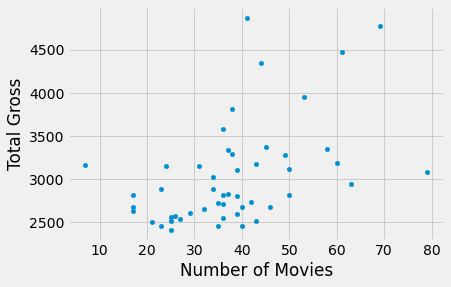

In [5]:
actors.plot.scatter('Number of Movies', 'Total Gross')

In [6]:
#Get the row for the actor with more than 75 movies
#actors.query("'Number of Movies' > 75") doesn't work because of spaces in the column name
actors.loc[actors['Number of Movies']>75]

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
19,Robert DeNiro,3081.3,79,39.0,Meet the Fockers,279.3


In [7]:
#an aside (since it came up in class - skip if not interested)
# using .loc is easiest for a simple logical condition as shown above
# but if you want to use .iloc, one way to do it is to create a boolean array.

#busy_actors has one entry for each row of actors that is True if the predicate is True
#and False otherwise.
busy_actors=actors.iloc[:,2:3]>75

#this will return rows from actors corresponding to True values in the array
actors[busy_actors.values]

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
19,Robert DeNiro,3081.3,79,39.0,Meet the Fockers,279.3


<AxesSubplot:xlabel='Number of Movies', ylabel='Average per Movie'>

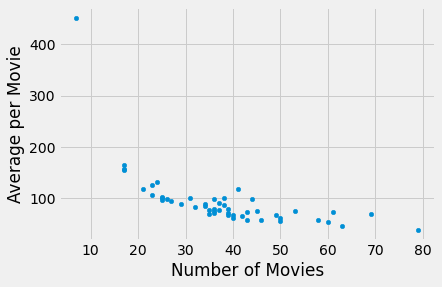

In [8]:
actors.plot.scatter('Number of Movies', 'Average per Movie')

In [9]:
actors.loc[actors['Number of Movies']<10]

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
14,Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


### Who is Anthony Daniels???? ###

## Categorical Distributions ##

In [10]:
top = pd.read_csv('./data/top_movies_2017.csv')
top.head(10)

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997
5,The Ten Commandments,Paramount,65500000,1164590000,1956
6,Jaws,Universal,260000000,1138620700,1975
7,Doctor Zhivago,MGM,111721910,1103564200,1965
8,The Exorcist,Warner Brothers,232906145,983226600,1973
9,Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [11]:
#that's a bit hard to read - pretty print it
#we can use style.format to display numbers with thousands separators

top.head(10).style.format({
    "Gross": "{:,d}",
    "Gross (Adjusted)": "{:,d}"
})

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
2,The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
6,Jaws,Universal,"260,000,000","1,138,620,700",1975
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
8,The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


### The groupby() function can tell us some useful summary statistics about the categories (i.e., "groups")

In [12]:
#This returns a Series with one entry for each distinct studio
type(top.groupby('Studio').Gross.sum())


pandas.core.series.Series

In [13]:
#can use "reset_index()" to turn the result back into a dataframe
gross_by_studio = top.groupby('Studio').Gross.sum().reset_index()
gross_by_studio

,Studio,Gross
0,AVCO,104945305
1,Buena Vista,12370356892
2,Columbia,860425219
3,Disney,1100688229
4,Dreamworks,925432167
5,Fox,5569320061
6,IFC,241438208
7,Lionsgate,1169814624
8,MGM,704168476
9,Metro,9183673


In [14]:
#maybe you want the result sorted and pretty printed?
gross_by_studio.sort_values('Gross',ascending=False)\
    .style.format({"Gross": "{:,d}"})

,Studio,Gross
1,Buena Vista,"12,370,356,892"
22,Warner Brothers,"6,885,884,774"
21,Universal,"5,623,192,345"
5,Fox,"5,569,320,061"
13,Paramount,"5,026,512,153"
11,Newline,"1,468,146,392"
14,Paramount/Dreamworks,"1,396,468,550"
17,Sony,"1,364,513,042"
7,Lionsgate,"1,169,814,624"
3,Disney,"1,100,688,229"


In [15]:
### Sometimes you may want to group by multiple columns
top.groupby(['Year','Studio']).Title.count()\
    .reset_index().sort_values('Title',ascending=False).head(10)

,Year,Studio,Title
169,2016,Buena Vista,5
168,2015,Universal,3
167,2015,Buena Vista,3
81,1987,Paramount,2
161,2013,Buena Vista,2
110,1997,Universal,2
113,1999,Buena Vista,2
147,2008,Paramount,2
65,1980,Fox,2
75,1984,Paramount,2


In [16]:
### Can use double brackets to extract a column and have the result be a dataframe (not a series)
studios = top[['Studio']]
studios.head(10)

,Studio
0,MGM
1,Fox
2,Fox
3,Universal
4,Paramount
5,Paramount
6,Universal
7,MGM
8,Warner Brothers
9,Disney


In [17]:
#what if we wanted them sorted?
studios.sort_values('Studio').head(10)

,Studio
21,AVCO
199,Buena Vista
109,Buena Vista
164,Buena Vista
115,Buena Vista
119,Buena Vista
129,Buena Vista
161,Buena Vista
28,Buena Vista
160,Buena Vista


In [18]:
#if you want to reset the index
#"drop" tells reset_index to drop the original index (otherwise it is kept as a new column)
studios = studios.sort_values('Studio').reset_index(drop=True)
studios.head(10)

,Studio
0,AVCO
1,Buena Vista
2,Buena Vista
3,Buena Vista
4,Buena Vista
5,Buena Vista
6,Buena Vista
7,Buena Vista
8,Buena Vista
9,Buena Vista


In [19]:
studio_distribution = top.groupby(['Studio']).Title.count()\
    .reset_index().sort_values('Title',ascending=False)
studio_distribution.head(10)

,Studio,Title
1,Buena Vista,35
22,Warner Brothers,29
13,Paramount,25
5,Fox,24
21,Universal,23
3,Disney,11
2,Columbia,9
8,MGM,7
20,United Artists,6
11,Newline,5


In [20]:
# sanity check - did we account for all rows?
studio_distribution.Title.sum()

200

## Bar Charts ##

<AxesSubplot:xlabel='Studio'>

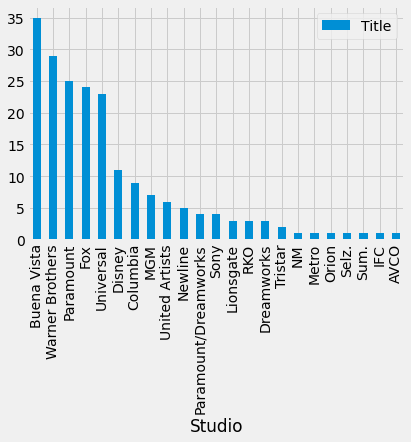

In [21]:
#create a bar chart?
studio_distribution.plot.bar('Studio')

<AxesSubplot:ylabel='Studio'>

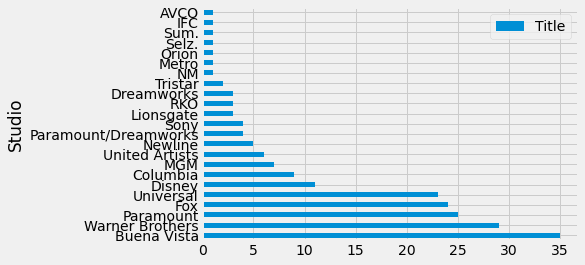

In [22]:
#create a bar chart?
studio_distribution.plot.barh('Studio')

<AxesSubplot:ylabel='Studio'>

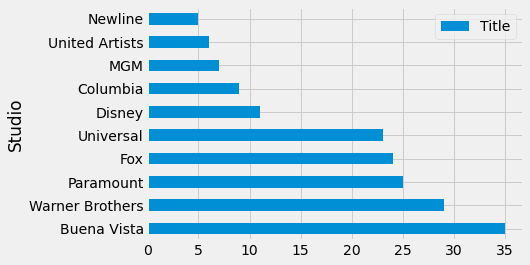

In [23]:
#To see only the top 10
studio_distribution.head(10).plot.barh('Studio')

<AxesSubplot:ylabel='Studio'>

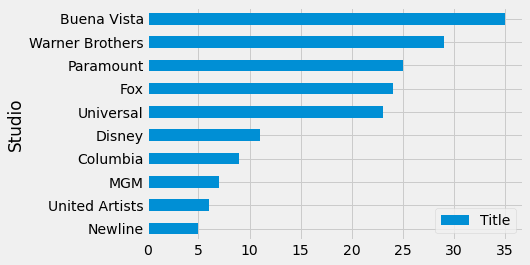

In [24]:
#can flip it around to have the bigger ones on top by sorting.  
#Note that we also had to swtich from .head() to .tail().

sorted_sd = studio_distribution.sort_values('Title')
sorted_sd.tail(10).plot.barh('Studio')

   ## Binning ##

In [25]:
#Let's add a column for how old each movie was at the time (i.e. 2017)
ages = 2017 - top.Year
top['Age'] = ages
top.head()


,Title,Studio,Gross,Gross (Adjusted),Year,Age
0,Gone with the Wind,MGM,198676459,1796176700,1939,78
1,Star Wars,Fox,460998007,1583483200,1977,40
2,The Sound of Music,Fox,158671368,1266072700,1965,52
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,35
4,Titanic,Paramount,658672302,1204368000,1997,20


In [26]:
#what's the range of ages in the ages array?
print('minimum age is', min(ages), '; maximum age is', max(ages))

minimum age is 0 ; maximum age is 96


In [27]:
#or can do this with the "top" table
print('minimum age is', min(top.Age), '; maximum age is', max(top.Age))

minimum age is 0 ; maximum age is 96


### binning groups items into value ranges ###

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

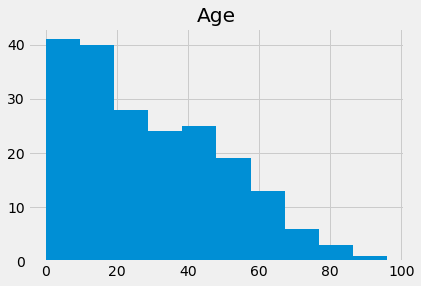

In [28]:
top.hist('Age')

## Equal sized bins preserve the area principle (look what can happen when with unequal sized bins)

In [29]:
my_bins = np.array([0, 5, 10, 15, 25, 40, 65, 80, 100])
my_bins

array([  0,   5,  10,  15,  25,  40,  65,  80, 100])

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

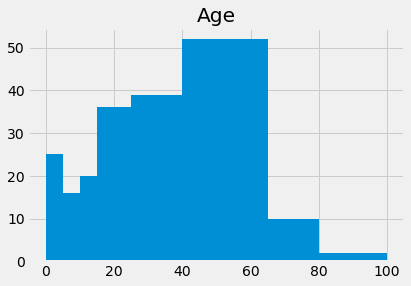

In [30]:
top.hist('Age',bins=my_bins)

## But smaller bins can show some interesting details

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

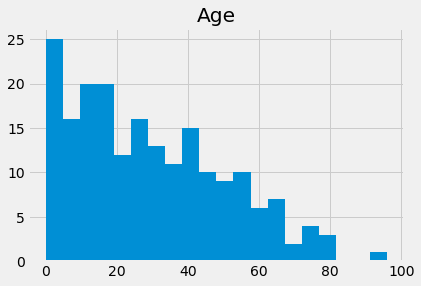

In [31]:
#Increasing the number of bins gives a finer-grained view of the distribution.
#But this may not be as smooth as a histogram of the same data using larger bins.
top.hist('Age',bins=20)